### The notebook shows how to use SLRealzer's own deblend method.

In [1]:
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [3]:
db = om10.DB(catalog='../data/qso_mock.fits')
#db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
db.calculate_size()
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems


In [4]:
# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  10670
Number of these with 4 images =  1559
Number of these with i3 < 22 =  705


OM10: selection yields 20 lenses
OM10: Extracted OM10 lens number 14428:
LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------ -------- ---- ----- ... ------------- ------------- -------------
 14428        0    2 0.062 ...         22.81 22.7755357852          99.0
THIS IS HOW THE SYSTEM LOOKS LIKE BEFORE DEBLENDING ********************************
THIS IS HOW THE SYSTEM LOOKS LIKE AFTER DEBLENDING **************************
OM10: Extracted OM10 lens number 14428:
LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------ -------- ---- ----- ... ------------- ------------- -------------
 14428        0    2 0.062 ...         22.81 22.7755357852          99.0
returned
[60279.265047, 'i', 0, 0, 0, 0, 0.09491178327687631, 0, 0.10290105177266476, 0, 4784.395348169925, 0.1418949030645497, 10.601069741308635, 0, -0.21339739859104156, 0.028438342735171318, 0.21528397307497588, -0.066242054193228705, 1.141117, 22.872657999999998, 14428]
['60279.26

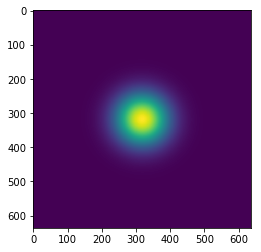

In [5]:
array = realizer.plot_lens_random_date(lensID=db.sample[0]['LENSID'])

OM10: selection yields 20 lenses
OM10: Extracted OM10 lens number 39385880:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
39385880        0    2  1.13 ...         22.85 22.7629959745  23.972104031
THIS IS HOW THE SYSTEM LOOKS LIKE BEFORE DEBLENDING ********************************
THIS IS HOW THE SYSTEM LOOKS LIKE AFTER DEBLENDING **************************
OM10: Extracted OM10 lens number 39385880:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
39385880        0    2  1.13 ...         22.85 22.7629959745  23.972104031
None


TypeError: 'NoneType' object has no attribute '__getitem__'

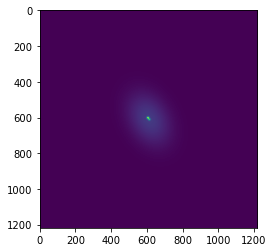

In [6]:
array = realizer.plot_lens_random_date(lensID=db.sample[1]['LENSID'])

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[2]['LENSID'])

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[3]['LENSID'])

In [ ]:
print array[6] # x first moment
print array[8] # y first moment
print array[10] # flux
print array[12] # size
print array[15] # e
print array[16] # phi
import galsim

galaxy = galsim.Gaussian(flux=array[10],sigma=array[12])
galaxy = galaxy.shift(array[6],array[8])
galaxy = galaxy.shear(e=array[15], beta=array[16]*57.2958*galsim.degrees)
img = galaxy.drawImage(scale=0.02)
plt.imshow(img.array)

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[5]['LENSID'])

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[6]['LENSID'])

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[7]['LENSID'])

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[8]['LENSID'])

In [ ]:
array = realizer.plot_lens_random_date(lensID=db.sample[9]['LENSID'])